In [2]:
import numpy as np
import math
from scipy.stats import skew, kurtosis, kurtosistest
import matplotlib.pyplot as plt
from scipy.stats import norm, t
import FinanceDataReader as fdr

ticker = '005930' # Samsung Electronics in KRX

rtn = fdr.DataReader(ticker, '2015-01-01', '2017-12-31')['Change']

In [7]:
mu_gaussian, sig_gaussian = norm.fit(rtn)

dx = 0.0001  # resolution
x = np.arange(-0.1, 0.1, dx)

# Gaussian fitting
gaussian_pdf = norm.pdf(x, mu_gaussian, sig_gaussian)
print("Gaussian mean  = %.5f" % mu_gaussian)
print("Gaussian std = %.5f" % sig_gaussian)
print()

# Student t fitting
parm = t.fit(rtn)
nu, mu_t, sig_t = parm
nu = np.round(nu)
t_pdf = t.pdf(x, nu, mu_t, sig_t)
print("nu = %.2f" % nu)
print("Student t mean  = %.5f" % mu_t)
print("Student t std = %.5f" % sig_t)

Gaussian mean  = 0.00102
Gaussian std = 0.01623

nu = 6.00
Student t mean  = 0.00127
Student t std = 0.01317


In [10]:
# Compute VaRs and CVaRs
 
h = 1
alpha = 0.01  # significance level
lev = 100*(1-alpha)
xanu = t.ppf(alpha, nu)
 
CVaR_n = alpha**-1 * norm.pdf(norm.ppf(alpha))*sig_gaussian - mu_gaussian
VaR_n = norm.ppf(1-alpha)*sig_gaussian - mu_gaussian
 
VaR_t = np.sqrt((nu-2)/nu) * t.ppf(1-alpha, nu)*sig_gaussian  - h*mu_gaussian
CVaR_t = -1/alpha * (1-nu)**(-1) * (nu-2+xanu**2) * \
                t.pdf(xanu, nu)*sig_gaussian  - h*mu_gaussian
 
print("%g%% %g-day Gaussian VaR     = %.2f%%" % (lev, h, VaR_n*100))
print("%g%% %g-day Gaussian CVaR  = %.2f%%" % (lev, h, CVaR_n*100))
print("%g%% %g-day Student t VaR  = %.2f%%" % (lev, h, VaR_t *100))
print("%g%% %g-day Student t CVaR = %.2f%%" % (lev, h, CVaR_t*100))

99% 1-day Gaussian VaR     = 3.67%
99% 1-day Gaussian CVaR  = 4.22%
99% 1-day Student t VaR  = 4.06%
99% 1-day Student t CVaR = 5.62%


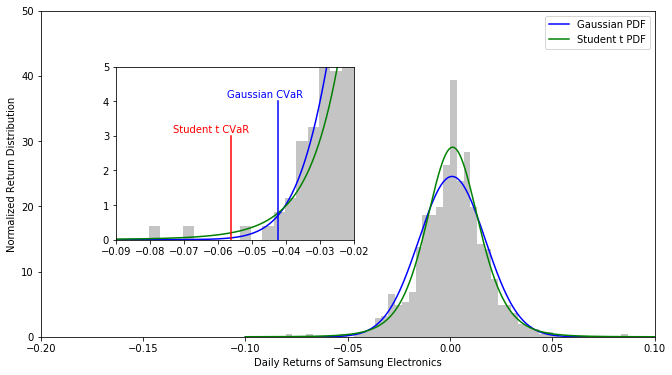

In [19]:
plt.figure(num=1, figsize=(11, 6))
grey = .77, .77, .77
# main figure
plt.hist(rtn, bins=50, normed=True, color=grey, edgecolor='none')
plt.axis("tight")
plt.plot(x, gaussian_pdf, 'b', label="Gaussian PDF")
plt.axis("tight")
plt.plot(x, t_pdf, 'g', label="Student t PDF")
plt.xlim([-0.2, 0.1])
plt.ylim([0, 50])
plt.legend(loc="best")
plt.xlabel("Daily Returns of Samsung Electronics")
plt.ylabel("Normalized Return Distribution")

# inset
a = plt.axes([.22, .35, .3, .4])
plt.hist(rtn, bins=50, normed=True, color=grey, edgecolor='none')
plt.plot(x, gaussian_pdf, 'b')
plt.plot(x, t_pdf, 'g')
# Student VaR line
plt.plot([-CVaR_t, -CVaR_t], [0, 3], c='r')
# Gaussian VaR line
plt.plot([-CVaR_n, -CVaR_n], [0, 4], c='b')
plt.text(-CVaR_n-0.015, 4.1, "Gaussian CVaR", color='b')
plt.text(-CVaR_t-0.0171, 3.1, "Student t CVaR", color='r')
plt.xlim([-0.09, -0.02])
plt.ylim([0, 5])
plt.show()

reference : http://www.quantatrisk.com/2016/12/08/conditional-value-at-risk-normal-student-t-var-model-python/